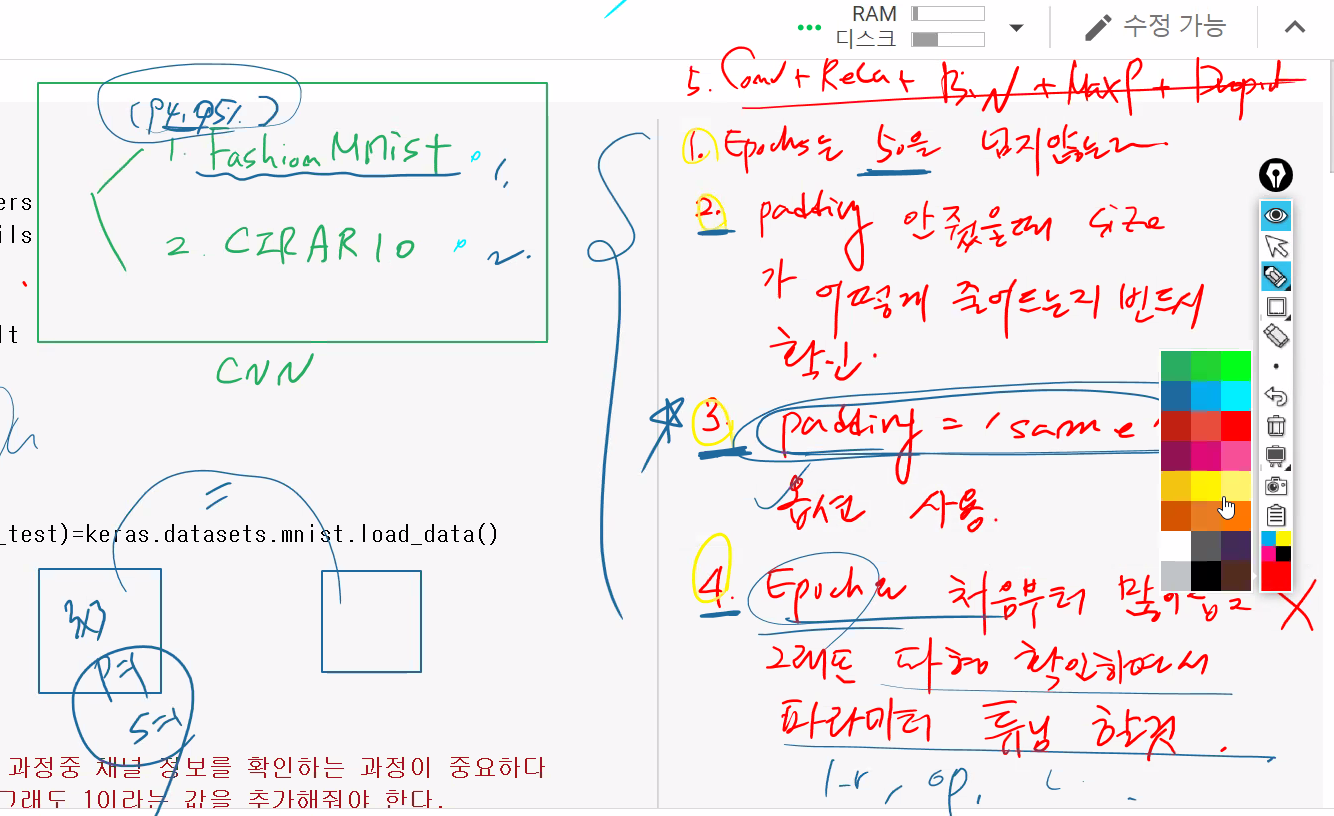

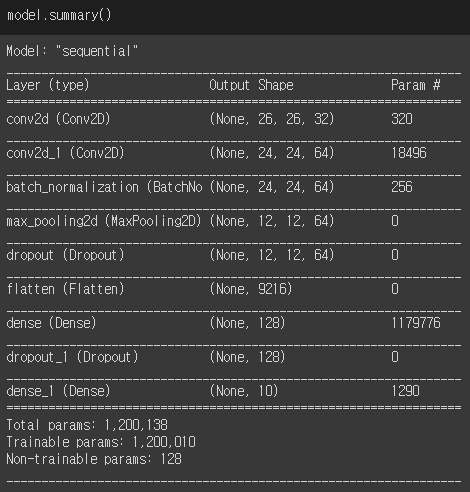

In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import backend

In [2]:
# DataLoader
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape # 흑백은 채널이 따로 없지만, CNN을 위해 채널 필요함

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
H, W = X_train.shape[1:]

In [4]:
channel = backend.image_data_format()
channel

if channel == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, H, W) # X_train.shape[0] 대신에 -1 써도 동일한 표현
    X_test = X_test.reshape(X_test.shape[0], 1, H, W)
    input_shape = (1, H, W) # 채널이 앞으로 간다
else:
    X_train = X_train.reshape(X_train.shape[0], H, W, 1)
    X_test = X_test.reshape(X_test.shape[0], H, W, 1)
    input_shape = (H, W, 1) # 채널이 뒤로 간다

In [5]:
# scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
# y값 전처리하기...One Hot Encoding
print(y_train[0])
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
print(Y_train[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [18]:
# model 생성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
# 마지막에 1차원으로 펼쳐서 FCN을 만든다.
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
# compile
model.compile('SGD', 'categorical_crossentropy', 'accuracy')

In [24]:
# fit&history
history = model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 15s 34ms/step - loss: 0.0543 - accuracy: 0.9806 - val_loss: 0.2100 - val_accuracy: 0.9419
Epoch 2/50
375/375 [==============================] - 12s 31ms/step - loss: 0.0524 - accuracy: 0.9811 - val_loss: 0.2155 - val_accuracy: 0.9374
Epoch 3/50
375/375 [==============================] - 12s 31ms/step - loss: 0.0552 - accuracy: 0.9810 - val_loss: 0.2009 - val_accuracy: 0.9408
Epoch 4/50
375/375 [==============================] - 12s 31ms/step - loss: 0.0509 - accuracy: 0.9821 - val_loss: 0.2130 - val_accuracy: 0.9416
Epoch 5/50
375/375 [==============================] - 12s 32ms/step - loss: 0.0508 - accuracy: 0.9823 - val_loss: 0.2081 - val_accuracy: 0.9398
Epoch 6/50
375/375 [==============================] - 12s 32ms/step - loss: 0.0475 - accuracy: 0.9823 - val_loss: 0.2058 - val_accuracy: 0.9410
Epoch 7/50
375/375 [==============================] - 12s 32ms/step - loss: 0.0489 - accuracy: 0.9829 - val_loss: 0.2003 - val_accuracy:

In [25]:
# evaluation
score = model.evaluate(X_test, Y_test)
print("Loss : {}, Accuracy : {}".format(*score))

313/313 [==============================] - 2s 7ms/step - loss: 0.2388 - accuracy: 0.9407
Loss : 0.23884686827659607, Accuracy : 0.9406999945640564


In [26]:
# 시각화
# history...학습할 때 나오는 로그메시지 다 모아서 리턴
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])

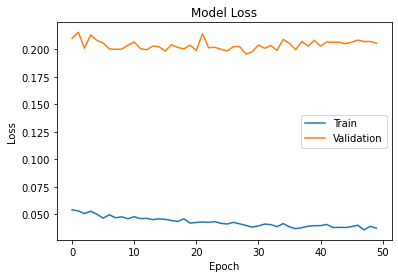

In [27]:
plot_loss(history)

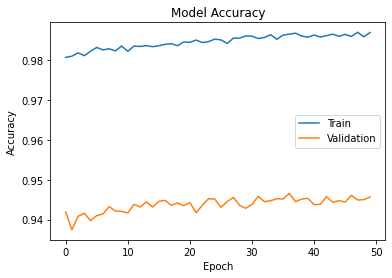

In [28]:
plot_accuracy(history)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       